In [1]:
#@title Python Lab 4 {display-mode: "form"}
#@markdown ##Understanding simple and multiple linear regression
#@markdown In this lab we have the following learning objectives: 
#@markdown 
#@markdown 1. To build a linear regression model from data and interpret its regression coefficients. 
#@markdown 1. To assess the fit of the regression model. 
#@markdown 1. To obtain predictions from the model. 

import statsmodels.api as sm
crime = sm.datasets.statecrime.load_pandas()
crime.data.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [2]:
#@markdown {display-mode: "form"}
#@markdown We fit a linear regression model that predicts the murder rate from other covariates
import statsmodels.formula.api as smf 

results = smf.ols('murder~hs_grad+poverty+single+white+urban', data=crime.data). \
  fit()
  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     41.02
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.14e-15
Time:                        02:06:38   Log-Likelihood:                -94.102
No. Observations:                  51   AIC:                             200.2
Df Residuals:                      45   BIC:                             211.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.6761     12.303     -3.875      0.0

## Tutorial questions 

1. State the model predictors and response value? 
1. Asses the overall fit of the model? Is it good? 
1. Interpret the effect of each predictor on the murder rate. Take into account it's statistical significance, the confidence interval estimate of its regression coefficient. 


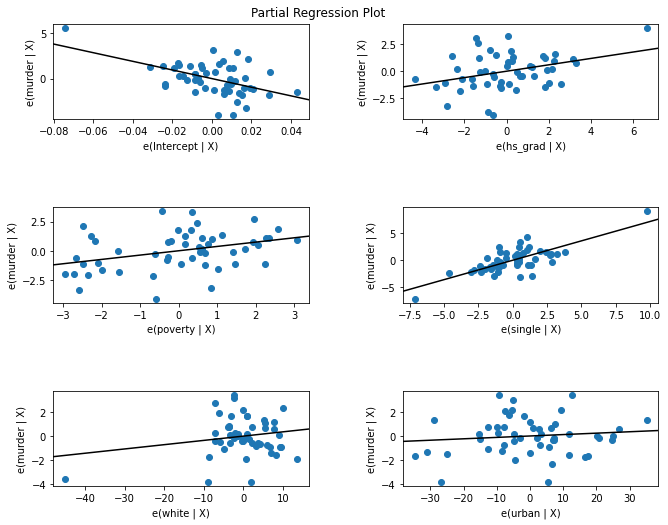

In [3]:
#@title Partial regression plot {display-mode: "form"}
#@markdown The plots below show the estimated influence each covariate has on the murder rate taking into account the effects of other covariates. 
#@markdown
#@markdown Notice that there is one data point which exerts disproportionate influence upon the model. 

%matplotlib inline 
import matplotlib.pyplot as plt

def make_regression_plot(plotf, results, **plotfkwargs): 
  fig = plotf(results, **plotfkwargs)
  fig.set_figheight(8) 
  fig.set_figwidth(10)

from statsmodels.graphics.api import plot_partregress_grid

make_regression_plot(plot_partregress_grid, results) 

# Identifying outlier point
# from statsmodels.graphics.api import plot_leverage_resid2 

# make_regression_plot(plot_leverage_resid2, results)

In [5]:
#@markdown Determine the 95% prediction interval for the state of California {display-mode:"form"}
state = "District of Columbia" #@param ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas ", "Kentucky ", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana ", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
conf = 0.95 #@param {type:"slider", min:0.8, max:0.99, step:0.01}

from statsmodels.stats.outliers_influence import summary_table 
import numpy as np
import pandas as pd
import shutil 
from toolz import curry

WIDTH, _ = shutil.get_terminal_size()
__, data, cols = summary_table(results, alpha=1-conf)
i = np.argwhere(crime.data.index==state)

@curry
def modify_header(conf, s): 
  import re 
  return re.sub(r'\n\d+%', ' {}%'.format(int(conf*100)),s)
    
print(*map(modify_header(conf), cols[6:8]), sep='\t')
print('='*WIDTH)
print(*data[i, 6:8].ravel(), sep='\t')

Predict ci 95% low	Predict ci 95% upp
17.79733605175278	26.536727889684393
